

```
# This is formatted as code
```

**Sentiment Analysis on ethical chatGPT:** *Sakpere, Ohue, Sakpere, Yaya*


In [44]:
# Import the relevant modules (libraries/packages)

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
import spacy

import warnings

warnings.filterwarnings("ignore")



In [45]:
# Installing the package pattern

!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# Spacy makes it easy to build systems for information extraction.

import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob

from pattern.en import sentiment

**Loading Data from relevant sources**

In [47]:
# Use request package to make a GET request for the website.

req =requests.get('https://www.forbes.com/sites/bruceweinstein/2023/02/24/why-smart-leaders-use-chatgpt-ethically-and-how-they-do-it/?sh=33910cf4361b')


In [48]:
# using the correct encoding of html page

req.encoding = 'utf-8'

In [49]:
# Extract the html
html = req.text

In [50]:
# Printing the first 100 characters in html
print(html[:1000])

<!DOCTYPE html><html lang="en"><head><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/merriweather/merriweather-bold-webfont.woff2" type="font/woff2" crossorigin><link rel="preload" as="font" href="https://i.forbesimg.com/assets/fonts/work-sans/worksans-regular-webfont.woff2" type="font/woff2" crossorigin><script>window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;</script><script type="text/javascript" async src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async src="//imasdk.googleapis.com/js/sdkloader/ima3.js"></script><script type="text/javascript" async src="https://www.gstatic.com/readaloud/forbes/player/web/api/js/api.js"></script><title>Why Smart Leaders Use ChatGPT Ethically And How They Do It</title><meta charset="utf-8"><meta http-equiv="Content-Language" content="en_US"><link rel="shortcut icon" href="https://i.forbesimg.com/48X48-F.png"><meta name="referrer" content="no-referrer-

In [51]:
# Create a BeautifulSoup object
soup = BeautifulSoup(html)

In [52]:
# Get the text out of the soup
text = soup.get_text()

*The length of the selected text is 12721*

In [53]:
len(text)

12721

In [54]:
# See some text

print(text[:2000])

Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkey's Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customized 

In [55]:
# Show the entire text

text

"Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkey's Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customi

In [56]:
clean_text= text.replace("\n", " ")

In [57]:
clean_text= clean_text.replace("/", " ")       

In [58]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [59]:
clean_text

'Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customiz

In [60]:
# Get the sentences

sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [61]:
sentence

['Why Smart Leaders Use ChatGPT',
 'Ethically',
 'And How They Do ItSubscribe Sign InBETAThis is a BETA experience.',
 'You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am',
 'EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28,',
 '2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN:',
 'The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership',
 'StrategyWhy Smart Leaders Use ChatGPT',
 'Ethically',
 'And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbe

**There are 144 sentences**

In [62]:
print(len(sentence))

144


In [63]:
# Get the first sentence

print(sentence[0])

Why Smart Leaders Use ChatGPT


In [64]:
# Using TextBlob
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])


In [65]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [66]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      144 non-null    object 
 1   Polarity      144 non-null    float64
 2   Subjectivity  144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


**Polarity is between -1 (extreme negative), 0 (neutral) and 1 (extreme positive**

**Subjectivity is from 0 to 1, where 1 is extremely subjective**

In [68]:
df_textblob.head(20)

,Sentence,Polarity,Subjectivity
0,Why Smart Leaders Use ChatGPT,0.214286,0.642857
1,Ethically,0.200000,0.600000
2,And How They Do ItSubscribe Sign InBETAThis is...,0.000000,0.000000
3,You may opt-out by clicking hereMore From Forb...,0.000000,0.000000
4,EDTWhy Working From Home Is Here To StayMar 28...,0.500000,0.500000
5,"2023,10:15am EDTFailure-Proofing Your Meetings...",0.000000,0.000000
6,"The Changemaker InterviewMar 28, 2023,10:00am ...",0.000000,0.062500
7,StrategyWhy Smart Leaders Use ChatGPT,0.214286,0.642857
8,Ethically,0.200000,0.600000
9,"And How They Do ItBruce Weinstein, Ph.D.Contri...",0.600000,1.000000


**Most of the sentences are neutral interms of polarity and there are more positive sentiments than negative.** *see figure below*

Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

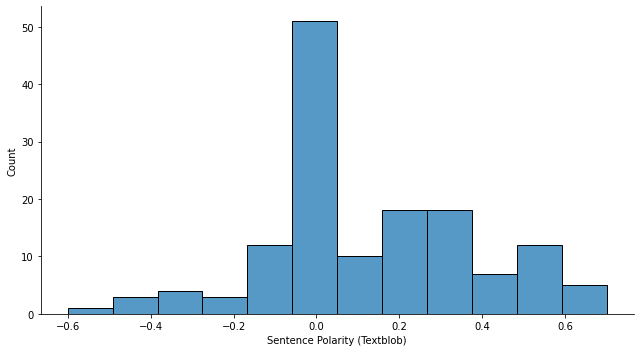

In [85]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

**More than two-thirds of the sentences scrapped are considered objective as shown in the figure below**

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

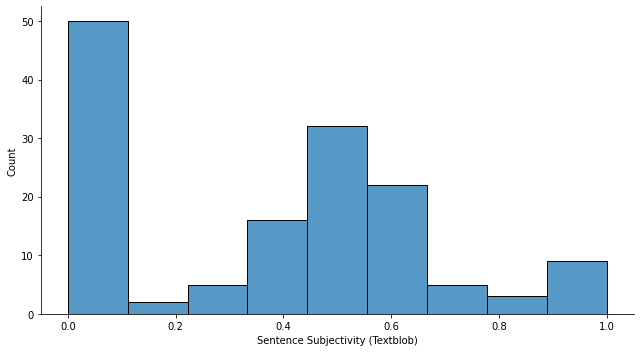

In [86]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [87]:
# Word cloud

clean_text[100:800]

'ence. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit'

In [88]:
clean_text

'Why Smart Leaders Use ChatGPT Ethically And How They Do ItSubscribe Sign InBETAThis is a BETA experience. You may opt-out by\xa0clicking hereMore From ForbesMar 29, 2023,05:32am EDTWhy Working From Home Is Here To StayMar 28, 2023,04:39pm EDTTo Support Women In The Workforce, Stop Focusing On WomenMar 28, 2023,12:07pm EDTThree Lessons For Israeli Protesters From Turkeys Gezi ProtestsMar 28, 2023,11:44am EDTLeading Better Starts With Living BetterMar 28, 2023,11:00am EDTApartment Rents Coming DownMar 28, 2023,10:15am EDTFailure-Proofing Your Meetings: A Neuroscience-Based Strategy For SuccessMar 28, 2023,10:00am EDTKevin Martinez, VP Corporate Citizenship, ESPN: The Changemaker InterviewMar 28, 2023,10:00am EDTThis AI-First Digital Engineering Company Is Transforming The Future Of BusinessEdit StoryForbesLeadershipLeadership StrategyWhy Smart Leaders Use ChatGPT Ethically And How They Do ItBruce Weinstein, Ph.D.ContributorOpinions expressed by Forbes Contributors are their own.Customiz

In [90]:
# Create tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+, 0-9, d+')

In [83]:
# Converting the sentence into words WORD TOKENIZE

from nltk.tokenize import word_tokenize

In [91]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [92]:
chatGPT_words = word_tokenize(clean_text)

In [93]:
chatGPT_words = [word for word in chatGPT_words if word.isalnum()]

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
from nltk.corpus import stopwords

In [98]:
stopwords = set(stopwords.words('english'))

In [99]:
chatGPT_words = [word for word in chatGPT_words if not str.lower(word) in stopwords]

In [100]:
# Check the frequency and probabilities
from nltk.probability import FreqDist

In [101]:
word_frequency = FreqDist(chatGPT_words)

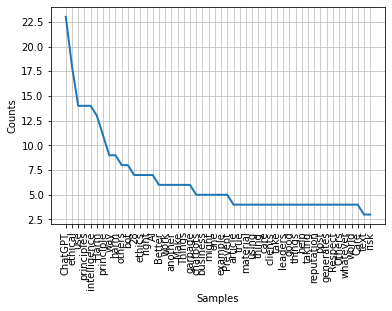

<Axes: xlabel='Samples', ylabel='Counts'>

In [102]:
# A plot of word frequency
word_frequency.plot(50, cumulative=False)

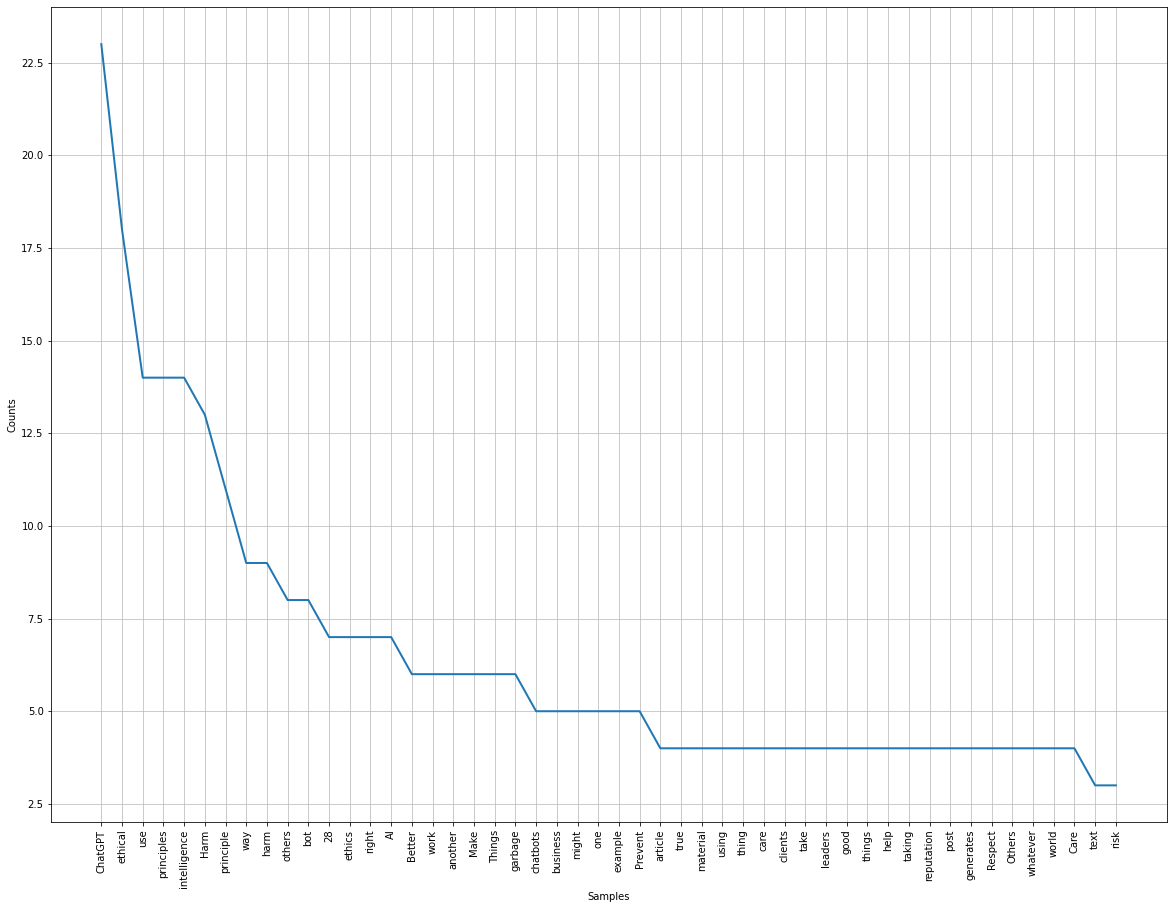

<Axes: xlabel='Samples', ylabel='Counts'>

In [103]:
# Make the above larger
plt.figure(figsize=(20,15))
word_frequency.plot(50, cumulative=False)

In [104]:
# Remove words that are not needed for our analysis.
# We have 50 words at the moment, remove new stopwords

chatGPT_words = [w for w in chatGPT_words if not w in ['28',]]


In [105]:
chatGPT_words

['Smart',
 'Leaders',
 'Use',
 'ChatGPT',
 'Ethically',
 'ItSubscribe',
 'Sign',
 'InBETAThis',
 'BETA',
 'experience',
 'may',
 'clicking',
 'hereMore',
 'ForbesMar',
 '29',
 'EDTWhy',
 'Working',
 'Home',
 'StayMar',
 'EDTTo',
 'Support',
 'Women',
 'Workforce',
 'Stop',
 'Focusing',
 'WomenMar',
 'EDTThree',
 'Lessons',
 'Israeli',
 'Protesters',
 'Turkeys',
 'Gezi',
 'ProtestsMar',
 'EDTLeading',
 'Better',
 'Starts',
 'Living',
 'BetterMar',
 'EDTApartment',
 'Rents',
 'Coming',
 'DownMar',
 'Meetings',
 'Strategy',
 'SuccessMar',
 'EDTKevin',
 'Martinez',
 'VP',
 'Corporate',
 'Citizenship',
 'ESPN',
 'Changemaker',
 'InterviewMar',
 'EDTThis',
 'Digital',
 'Engineering',
 'Company',
 'Transforming',
 'Future',
 'BusinessEdit',
 'StoryForbesLeadershipLeadership',
 'StrategyWhy',
 'Smart',
 'Leaders',
 'Use',
 'ChatGPT',
 'Ethically',
 'ItBruce',
 'Weinstein',
 'expressed',
 'Forbes',
 'Contributors',
 'ethics',
 'keynotes',
 'training',
 'online',
 'courses',
 'CE',
 'creditFollo

In [106]:
from wordcloud import WordCloud

In [107]:
chatGPT_words_new = (" ").join(chatGPT_words)

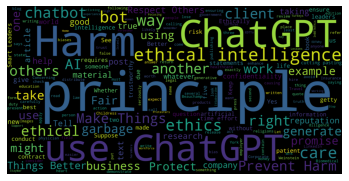

In [109]:
wordcloud = WordCloud(width=4000, height=2000).generate(chatGPT_words_new)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**This is a template for other sources**